In [849]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

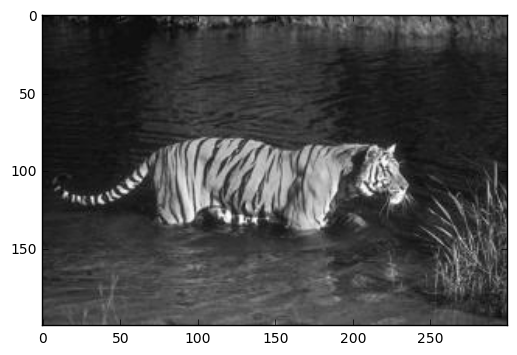

In [850]:
x=np.array(Image.open("tiger.jpg").convert("L"))
plt.imshow(x,plt.cm.gray)
plt.show()

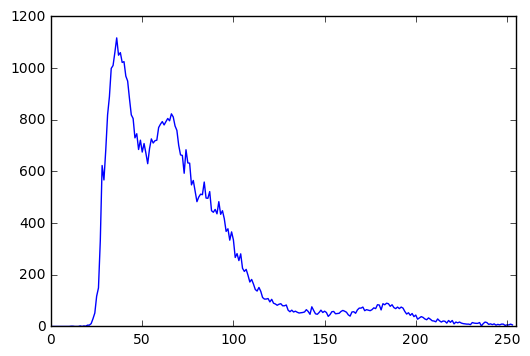

In [851]:

max_x=np.max(x)+1
all_value=[]
for i in range(max_x):
    value=np.sum(x==i)
    all_value.append(value)
    
plt.plot(all_value)
plt.xlim([0,255])
plt.show()

In [852]:
index=np.argwhere(all_value)
index=np.array(index)
total=len(index)
mcount=total


In [853]:
k=3
[m,n]=x.shape
pi=[1.0/3,1.0/3,1.0/3]
mu=np.arange(0,k)*(mcount)/(k+1)
R=1.0
sigma=[R,R,R]


In [854]:
labels=np.zeros(mcount)
Number=0
for iteration in range(1):
    for i in range(mcount):
        collection=[]
        for cc in range(k):
            value=pi[cc]*np.exp(-0.5*(all_value[i]-int(mu[cc]))**2/sigma[cc]**2)
            collection.append(value)
        collection=np.array(collection)
        myall=np.argwhere(collection==np.max(collection))
        labels[i]=myall[0]
        
    for count in range(k):
        res=(labels==count)
        index_n=index[res]
        Number=int(np.sum(res))
        pi[count]=1.0*Number/total
        mu[count]=np.int(1.0*np.sum(index_n)/Number)
        svalue=[]
        for l in range(int(Number)):
            s=abs(index_n[l]-int(mu[count==k]))
            svalue.append(s)
        svalue=np.array(svalue)
        sigma[count]=np.int(np.sum(svalue))/(Number)
        
        
        
    

C:\Users\kamal\Anaconda2\lib\site-packages\ipykernel\__main__.py:21: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future


In [855]:
mu,sigma,pi,Number

(array([111, 174, 123]),
 [61, 67, 32],
 [0.5941422594142259, 0.3472803347280335, 0.058577405857740586],
 14)

In [856]:
[m,n]=x.shape
new_label=np.zeros([m,n])
for i in range(m):
    for j in range(n):
        index=np.abs(x[i,j]-mu)
        center=np.argwhere(np.min(index)==index)
        new_label[i,j]=center[0,0]
        

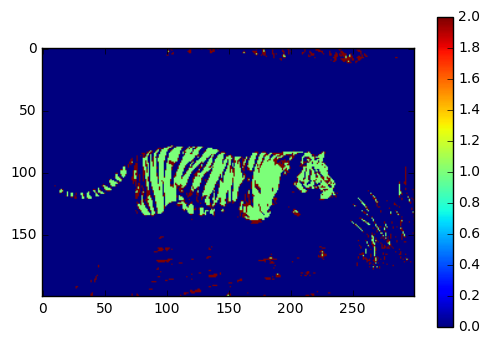

In [857]:
plt.imshow(new_label)
plt.colorbar()